In [3]:
library("tidyverse")
library("infer")
library("moderndive")
library("nycflights13")
library("ggplot2movies")

In [9]:
promotions |> sample_n(6) |> arrange(id)

id,decision,gender
<int>,<fct>,<fct>
12,promoted,male
28,promoted,female
31,promoted,female
35,promoted,female
40,not,female
48,not,female


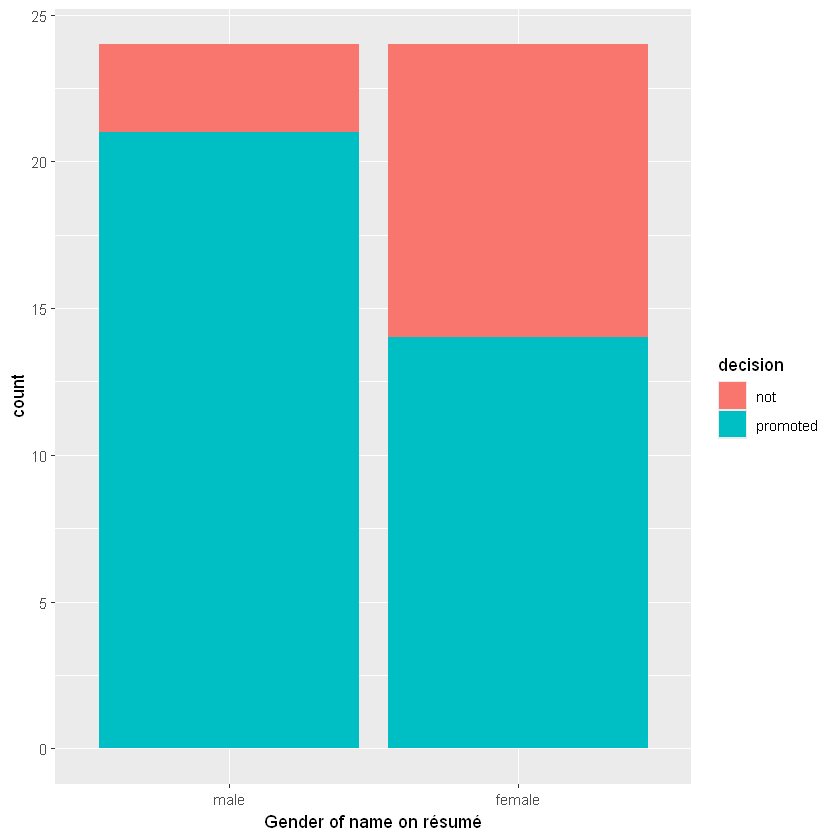

In [7]:
ggplot(promotions, aes(x = gender, fill = decision)) +
  geom_bar() +
  labs(x = "Gender of name on résumé")

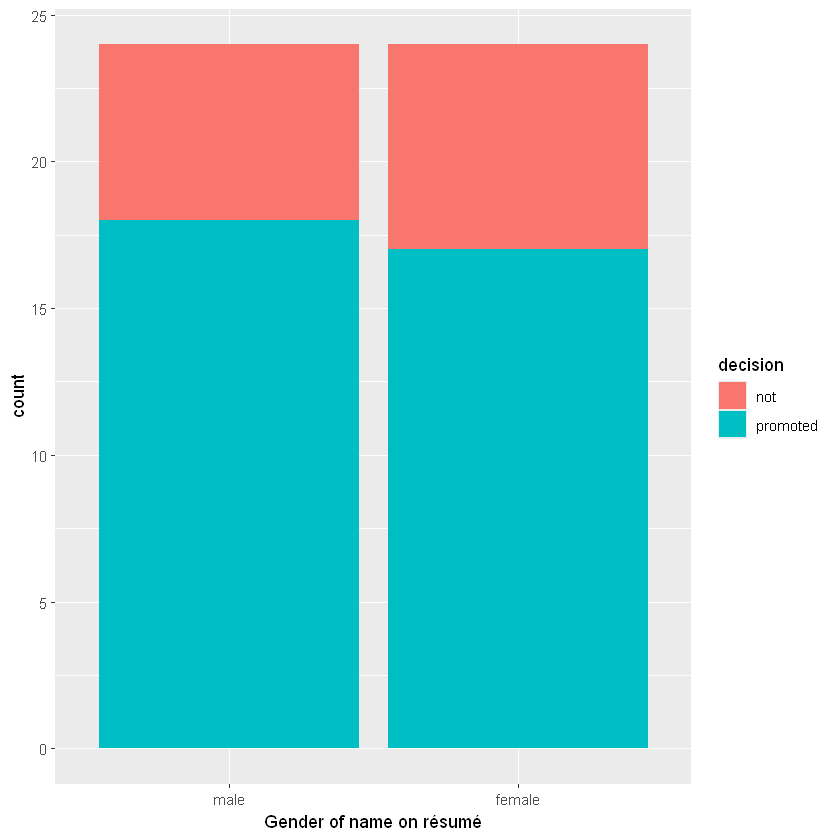

In [11]:
ggplot(promotions_shuffled, aes(x = gender, fill = decision)) +
  geom_bar() +
  labs(x = "Gender of name on résumé")

In [15]:
promotions |> group_by(gender, decision) |> tally()

gender,decision,n
<fct>,<fct>,<int>
male,not,3
male,promoted,21
female,not,10
female,promoted,14


In [12]:
promotions_shuffled |> group_by(gender, decision) |> tally()

gender,decision,n
<fct>,<fct>,<int>
male,not,6
male,promoted,18
female,not,7
female,promoted,17


In [23]:
(21/24*100)
(14/24*100)
(18/24*100)
(17/24*100)
(21/24*100) - (14/24*100)
(18/24*100) - (17/24*100)

[1] 87.5

[1] 58.33333

[1] 75

[1] 70.83333

[1] 29.16667

[1] 4.166667

# Conducting hypothesis tests
<h4>
<ol>
<li><b>specify()</b> the variables of interest in your data frame.</li>
<li><b>hypothesize()</b> the null hypothesis <i>H<sub>0</sub></i>. In other words, set a “model for the universe” assuming <i>H<sub>0</sub></i> is true.</li>
<li><b>generate()</b> shuffles assuming <i>H<sub>0</sub></i> is true. In other words, simulate data assuming <i>H<sub>0</sub></i> is true.</li>
<li><b>calculate()</b> the summary statistic of interest.</li>
<li><b>visualize()</b> the resulting null distribution and compute the p-value by comparing the null distribution to the observed test statistic.</li>
</ol>
</h4>

In [36]:
promotions |>
  specify(formula = decision ~ gender, success = "promoted") |> head()

decision,gender
<fct>,<fct>
promoted,male
promoted,male
promoted,male
promoted,male
promoted,male
promoted,male


In [37]:
promotions |>
  specify(formula = decision ~ gender, success = "promoted") |>
  hypothesize("independence") |> head()

decision,gender
<fct>,<fct>
promoted,male
promoted,male
promoted,male
promoted,male
promoted,male
promoted,male


In [ ]:
promotions |>
  specify(formula = decision ~ gender, success = "promoted") |>
  hypothesize("independence") |>
  generate(1000, type = "permute") |> nrow()

[1] 48000

In [46]:
null_distribution <- promotions |>
  specify(formula = decision ~ gender, success = "promoted") |>
  hypothesize("independence") |>
  generate(1000,type = "permute") |>
  calculate(stat = "diff in props", order = c("male", "female"))# ˆp male − ˆp female 
  
null_distribution |> head()

replicate,stat
<int>,<dbl>
1,-0.04166667
2,0.04166667
3,-0.12500000
4,0.20833333
5,-0.12500000
6,-0.12500000


In [47]:
obs_diff_prop <- promotions |>
  specify(formula = decision ~ gender, success = "promoted") |>
  calculate(stat = "diff in props", order = c("male", "female")) # p male − p female

obs_diff_prop

stat
<dbl>
0.2916667


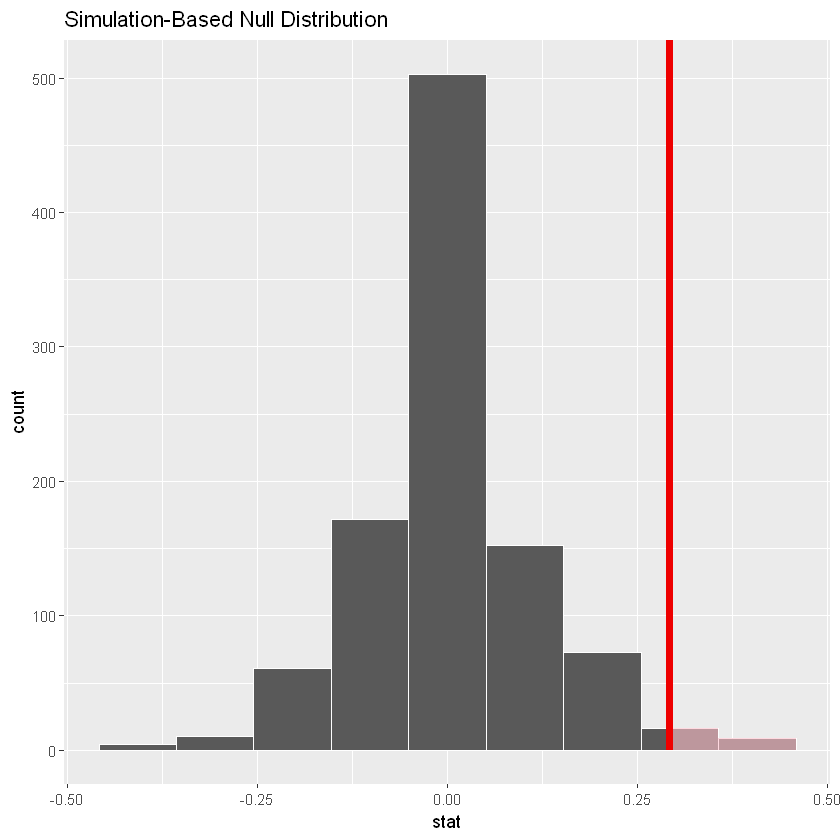

In [51]:
null_distribution |> visualize(bins = 10) +
  shade_p_value(obs_stat = obs_diff_prop, direction = "right")

# Comparison with Confidence Intervals

In [56]:
bootstrap_distribution  <- promotions |>
  specify(formula = decision ~ gender, success = "promoted") |>
  generate(reps = 1000, type = "bootstrap") |>
  calculate(stat = "diff in props", order = c("male", "female")) # ˆp male − ˆp female 
  
bootstrap_distribution |> head()

replicate,stat
<int>,<dbl>
1,0.13756614
2,0.25000000
3,0.27142857
4,0.42328042
5,0.34301270
6,0.01212121


In [57]:
percentile_ci <- bootstrap_distribution |> get_confidence_interval(level = 0.95, type = "percentile")

percentile_ci

lower_ci,upper_ci
<dbl>,<dbl>
0.04283467,0.5252174


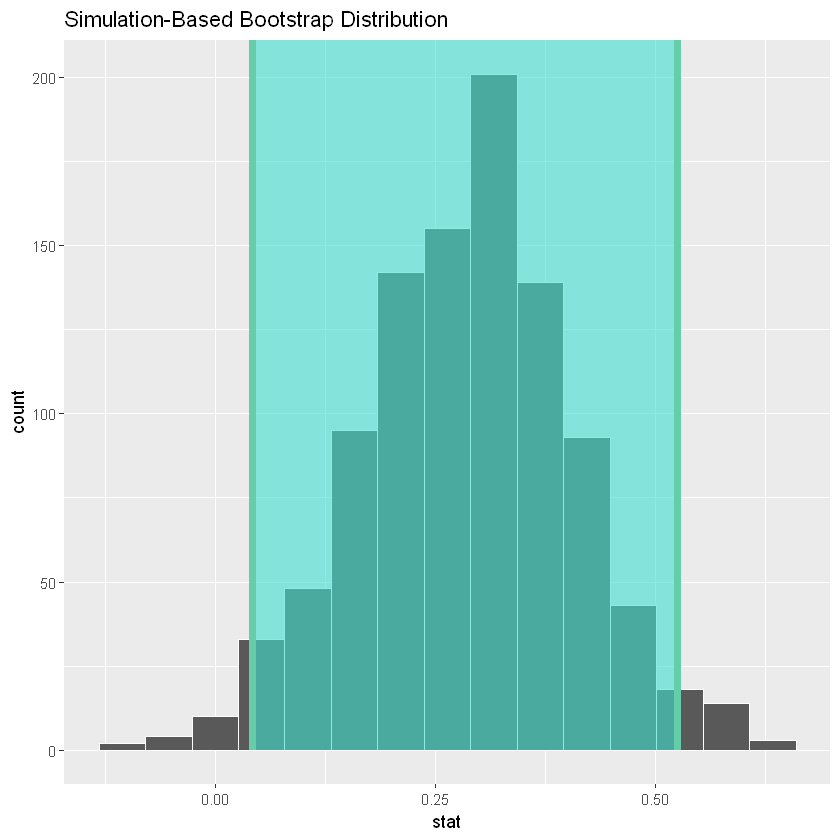

In [60]:
visualize(bootstrap_distribution) + shade_confidence_interval(endpoints = percentile_ci)

<h5>Notice a key value that is not included in the 95% confidence interval for <i>p<sub>m</sub> - p<sub>f</sub></i> : the value 0. In other words, a difference of 0 is not included in our net, suggesting that <i>p<sub>m</sub></i> and <i>p<sub>f</sub></i> are truly different! <br /> Furthermore, observe how the entirety of the 95% confidence interval for <i>p<sub>m</sub> - p<sub>f</sub></i> lies above 0, suggesting that this difference is in favor of men.</h5>

In [62]:
se_ci <- bootstrap_distribution |> get_confidence_interval(level = 0.95, type = "se", point_estimate = obs_diff_prop)

se_ci

lower_ci,upper_ci
<dbl>,<dbl>
0.05817533,0.525158


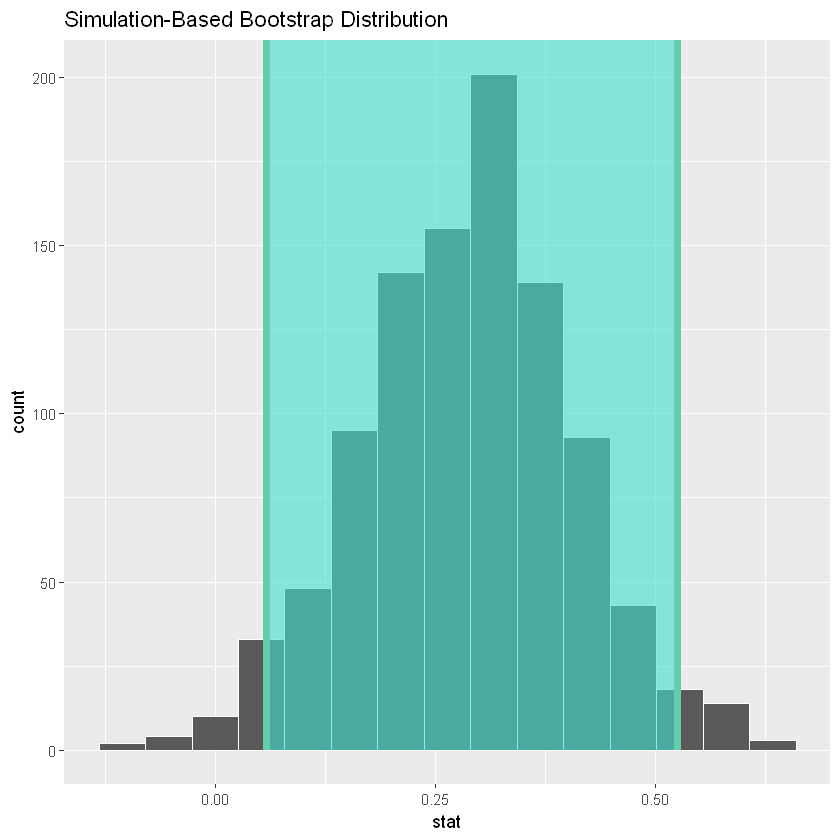

In [63]:
visualize(bootstrap_distribution) +
  shade_confidence_interval(endpoints = se_ci)

# Interpreting hypothesis tests

1. If the p-value < α, then we reject the null hypothesis H0 in favor of HA.
2. If the p-value >= α, we fail to reject the null hypothesis H0.

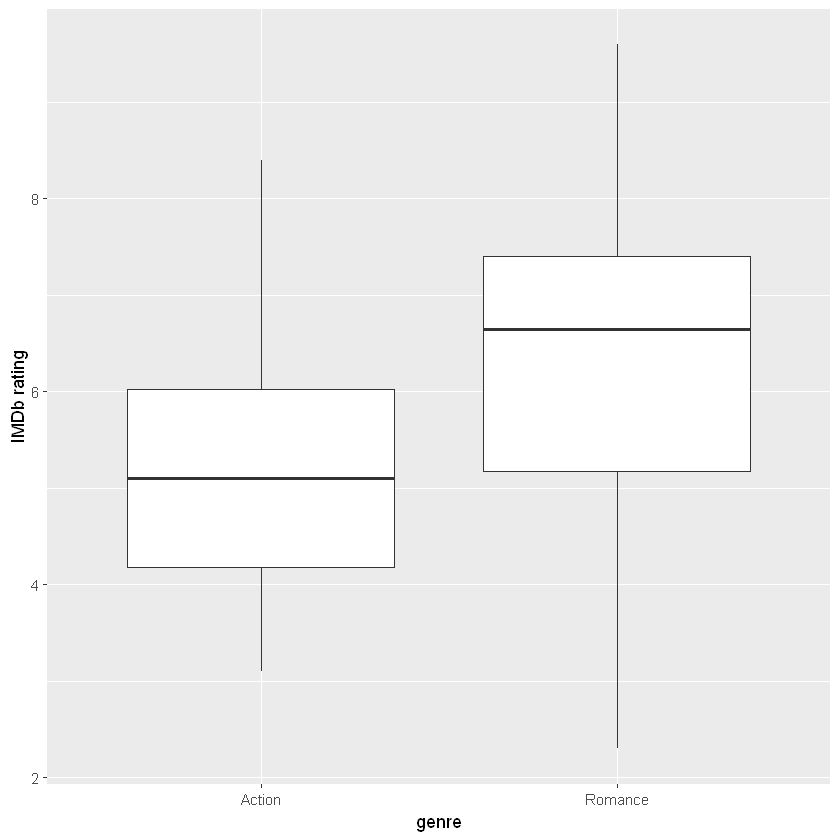

In [64]:
ggplot(data = movies_sample, aes(x = genre, y = rating)) +
  geom_boxplot() +
  labs(y = "IMDb rating")

In [67]:
movies_sample |>
  group_by(genre) |>
  summarize(n = n(), mean_rating = mean(rating), std_dev = sd(rating))

genre,n,mean_rating,std_dev
<chr>,<int>,<dbl>,<dbl>
Action,32,5.275000,1.361214
Romance,36,6.322222,1.609634


In [75]:
null_distribution_movies <- movies_sample |>
  specify(formula = rating ~ genre) |>
  hypothesize(null = "independence") |>
  generate(reps = 5000, type = "permute") |>
  calculate(stat = "diff in means",order = c("Action", "Romance"))

null_distribution_movies |> head()
null_distribution_movies |> tail()

replicate,stat
<int>,<dbl>
1,0.1628472
2,0.1274306
3,-0.4038194
4,-0.1736111
5,-0.1027778
6,-0.1322917


replicate,stat
<int>,<dbl>
4995,-0.24444444
4996,0.66458333
4997,0.45208333
4998,-0.04375000
4999,0.79444444
5000,-0.06145833


In [74]:
obs_diff_means <- movies_sample |>
  specify(formula = rating ~ genre) |>
  calculate(stat = "diff in means",order = c("Action", "Romance"))

null_distribution_movies

stat
<dbl>
-1.047222


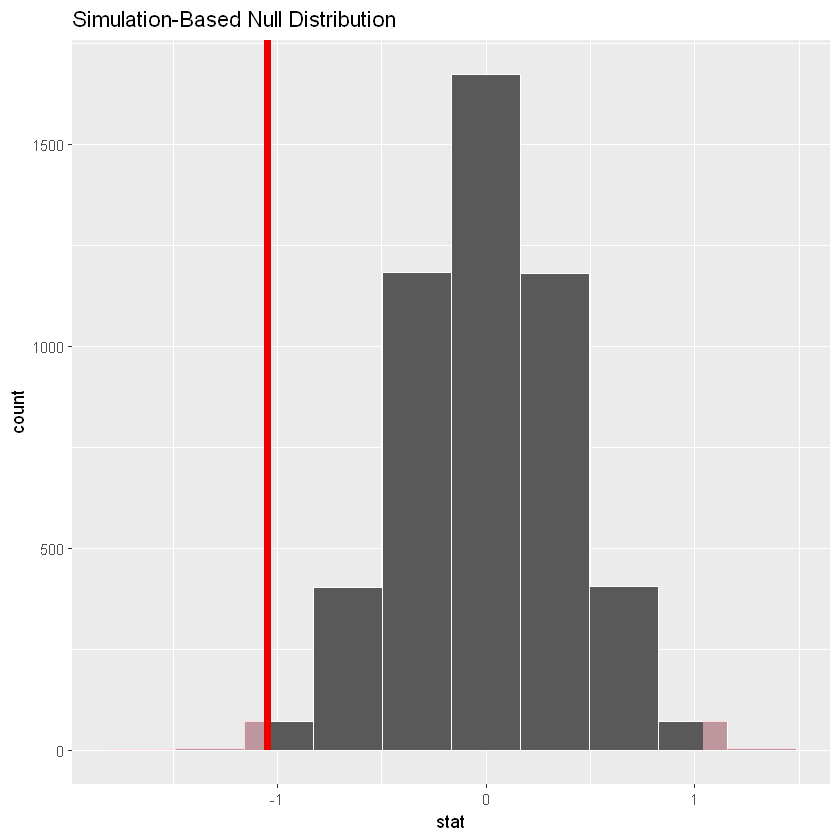

In [79]:
null_distribution_movies |> visualize(bins = 10) +
  shade_p_value(obs_stat = obs_diff_means, direction = "both")